# Predicting Solar Panel Adoption - Data Set Up
#### UC Berkeley MIDS
`Team: Gabriel Hudson, Noah Levy, Laura Williams`

This notebook starts with a public dataset from Stanford's DeepSolar team, available here:  
http://web.stanford.edu/group/deepsolar/home  

In [84]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [44]:
# load full dataset
deepsolar_original = pd.read_csv('../deepsolar_tract.csv', index_col=0, encoding='ISO-8859-1')

In [45]:
original_shape = deepsolar_original.shape
print("Dataset rows and dimensions:", original_shape)

Dataset rows and dimensions: (72537, 168)


This dataset has 169 variables (including one indexing variable in the first column) and 72,537 datapoints.  Variables include geographic identification variables, various outcome variables, variables used to calculate other variables, and weather, socio-economic, heating, electricity, political, transportation and incentive data.  Datapoints are per census tract. 

## Remove datapoints
Census tracts with zero population and/or zero households will not contribute to analysis about residential solar panels, so the datapoints for those census tracts are removed from the dataset.  

In [48]:
# look for census tracts with population of zero
deepsolar_original[deepsolar_original['population'] == 0].shape

(597, 168)

In [53]:
# remove those census tracts from the dataset
deepsolar_curated = deepsolar_original[deepsolar_original['population'] != 0]
deepsolar_curated.shape

(71940, 168)

In [54]:
# look for census tracts with household_count of zero
deepsolar_curated[deepsolar_curated['household_count'] == 0].shape

(174, 168)

In [55]:
# remove those census tracts from the dataset
deepsolar_curated = deepsolar_curated[deepsolar_curated['household_count'] != 0]
deepsolar_curated.shape

(71766, 168)

## Remove variables

Multiple variables and datapoints in this dataset will not contribute to analysis. Reasoning for each variable or set of datapoints removed from the dataset is defined below.

Load variable names from DeepSolar data

In [58]:
# extract variable names from header
deepsolar_header = pd.read_csv('../deepsolar_tract.csv', encoding='ISO-8859-1', nrows=0.).columns.tolist()

In [59]:
print("Number of variables: ", len(deepsolar_header))

Number of variables:  169


In [60]:
# load all variables into a dictionary for curating a variable list
variables_dict = {}
for var in deepsolar_header:
    variables_dict[var] = 1

Load variable metadata from DeepSolar. We referred to this metadata to make choices about some of the variables we removed.

In [61]:
# load variable metadata
deepsolar_meta = pd.read_csv('../deepsolar_tract_meta.csv', encoding='ISO-8859-1')

In [62]:
deepsolar_meta.head()

,column_name,explanation,source
0,tile_count,number of image tiles containing solar power s...,deepsolar
1,solar_system_count,number of solar power systems (after merging),deepsolar
2,total_panel_area,total area of solar panels (m^2),deepsolar
3,fips,census tract FIPS number,ACS 2015 (5-Year Estimates)
4,average_household_income,average annual houshold income ($),ACS 2015 (5-Year Estimates)


### Remove outcome variables

Some outcome variables from DeepSolar will not be used in our analysis

Outcome variables we're using:  
`number_of_solar_system_per_household` --  number of residential solar power systems per household

In [138]:
# set outcome variable for visualizations:
outcome_var = 'number_of_solar_system_per_household'

In [63]:
variables_dict['tile_count'] = 'Unused outcome variable: number of image tiles containing solar power system'
variables_dict['solar_system_count'] = 'Unused outcome variable: number of solar power systems (after merging)'
variables_dict['total_panel_area'] = 'Unused outcome variable: total area of solar panels (m^2)'
variables_dict['solar_panel_area_divided_by_area'] = 'Unused outcome variable: \
    solar panel area divided by total area (m^2/mile^2)'
variables_dict['solar_panel_area_per_capita'] = 'Unused outcome variable: \
    solar panel area per capita (m^2/capita)'
variables_dict['tile_count_residential'] = 'number of image tiles containing residential solar power system'
variables_dict['tile_count_nonresidential'] = 'Unused outcome variable: \
    number of image tiles containing non-residential solar power system'
variables_dict['solar_system_count_residential'] = 'Unused outcome variable: \
    number of residential solar power systems (after merging)'
variables_dict['solar_system_count_nonresidential'] = 'Unused outcome variable: \
    number of non-residential solar power systems (after merging)'
variables_dict['total_panel_area_residential'] = 'Unused outcome variable: \
    total area of residential solar panels (m^2)'
variables_dict['total_panel_area_nonresidential'] = 'Unused outcome variable: \
    total area of non-residential solar panels (m^2)'

### Remove variables that were used to calculate other variables

In [64]:
variables_dict['education_population'] = 'Used for calculating eduation proportions'
variables_dict['heating_fuel_housing_unit_count'] = 'Used for calculating heating proportions'
variables_dict['population'] = 'Used for calculating population density'
variables_dict['poverty_family_count'] = 'Used for calculating poverty level rate'
variables_dict['household_count'] = 'Used for calculating other household proportions'
variables_dict['housing_unit_count'] = 'Used for calculating other housing unit proportions'
variables_dict['housing_unit_occupied_count'] = 'Used for calculating other occupancy rates'

### Remove count variables
Some variables are counts of items whose proprotions are recorded in another variable

In [65]:
variables_dict['race_asian'] = 'Proportion recorded in another variable: race_asian_rate'
variables_dict['race_black_africa'] = 'Proportion recorded in another variable: race_black_africa_rate'
variables_dict['race_indian_alaska'] = 'Proportion recorded in another variable: race_indian_alaska_rate'
variables_dict['race_islander'] = 'Proportion recorded in another variable: race_islander_rate'
variables_dict['race_other'] = 'Proportion recorded in another variable: race_other_rate'
variables_dict['race_two_more'] = 'Proportion recorded in another variable: race_two_more_rate'
variables_dict['race_white'] = 'Proportion recorded in another variable: race_white_rate'
variables_dict['unemployed'] = 'Proportion recorded in another variable: employ_rate'
variables_dict['poverty_family_below_poverty_level'] = 'Proportion recorded in another variable: \
    poverty_family_below_poverty_level_rate'
variables_dict['heating_fuel_none'] = 'Proportion recorded in another variable: heating_fuel_none_rate'
variables_dict['heating_fuel_other'] = 'Proportion recorded in another variable: heating_fuel_other_rate'
variables_dict['heating_fuel_solar'] = 'Proportion recorded in another variable: heating_fuel_solar_rate'
variables_dict['education_professional_school'] = 'Proportion recorded in another variable: \
    education_professional_school_rate'
variables_dict['employed'] = 'Proportion recorded in another variable: employ_rate'
variables_dict['heating_fuel_coal_coke'] = 'Proportion recorded in another variable: heating_fuel_coal_coke_rate'
variables_dict['heating_fuel_electricity'] = 'Proportion recorded in another variable: heating_fuel_electricity_rate'
variables_dict['heating_fuel_fuel_oil_kerosene'] = 'Proportion recorded in another variable: \
    heating_fuel_fuel_oil_kerosene_rate'
variables_dict['heating_fuel_gas'] = 'Proportion recorded in another variable: heating_fuel_gas_rate'
variables_dict['education_bachelor'] = 'Proportion recorded in another variable: education_bachelor_rate'
variables_dict['education_college'] = 'Proportion recorded in another variable: education_college_rate'
variables_dict['education_doctoral'] = 'Proportion recorded in another variable: education_doctoral_rate'
variables_dict['education_high_school_graduate'] = 'Proportion recorded in another variable: \
    education_high_school_graduate_rate'
variables_dict['education_less_than_high_school'] = 'Proportion recorded in another variable: \
    education_less_than_high_school_rate'
variables_dict['education_master'] = 'Proportion recorded in another variable: education_master_rate'

### Remove variables highly correlated with another variable.
Multiple variables are highly correlated with other variables.  We used a Pearson correlation to identify variables with a Pearson correlation of more than 0.80 for positive correlations or lower than -0.80 for negative correlations, then looked more closely at those specific variables to determine which ones to remove from the dataset.

Create a separate version of the dataset for calculating correlations, removing non-numeric, indexing, and outcome variables.

In [66]:
# Remove non-numeric, indexing, and outcome variables for calculating linear correlations
variables_dict_corr = variables_dict
variables_dict_corr['state'] = 'non-numeric variable'
variables_dict_corr['county'] = 'non-numeric variable'
variables_dict_corr['fips'] = 'Census tract number'
variables_dict_corr['number_of_solar_system_per_household'] = 'Outcome variable'
# create list of variables to be dropped
drop_variables_corr = []
for key,val in variables_dict_corr.items():
    if val!=1:
        drop_variables_corr.append(key)
dropped_var_number = len(drop_variables_corr)
print("Number of variables to be dropped:", dropped_var_number)
print("After dropping variables, dataset should have", original_shape[1]-dropped_var_number, "dimensions.")
deepsolar_corr = deepsolar_curated.drop(labels=drop_variables_corr, axis=1)
print("Rows and dimensions of dataset for calculating correlations:", deepsolar_corr.shape)

Number of variables to be dropped: 46
After dropping variables, dataset should have 122 dimensions.
Rows and dimensions of dataset for calculating correlations: (71766, 122)


Calculate linear correlations between variables

In [67]:
# correlation_dataset=deepsolar[variables]
correlation_matrix=deepsolar_corr.corr()

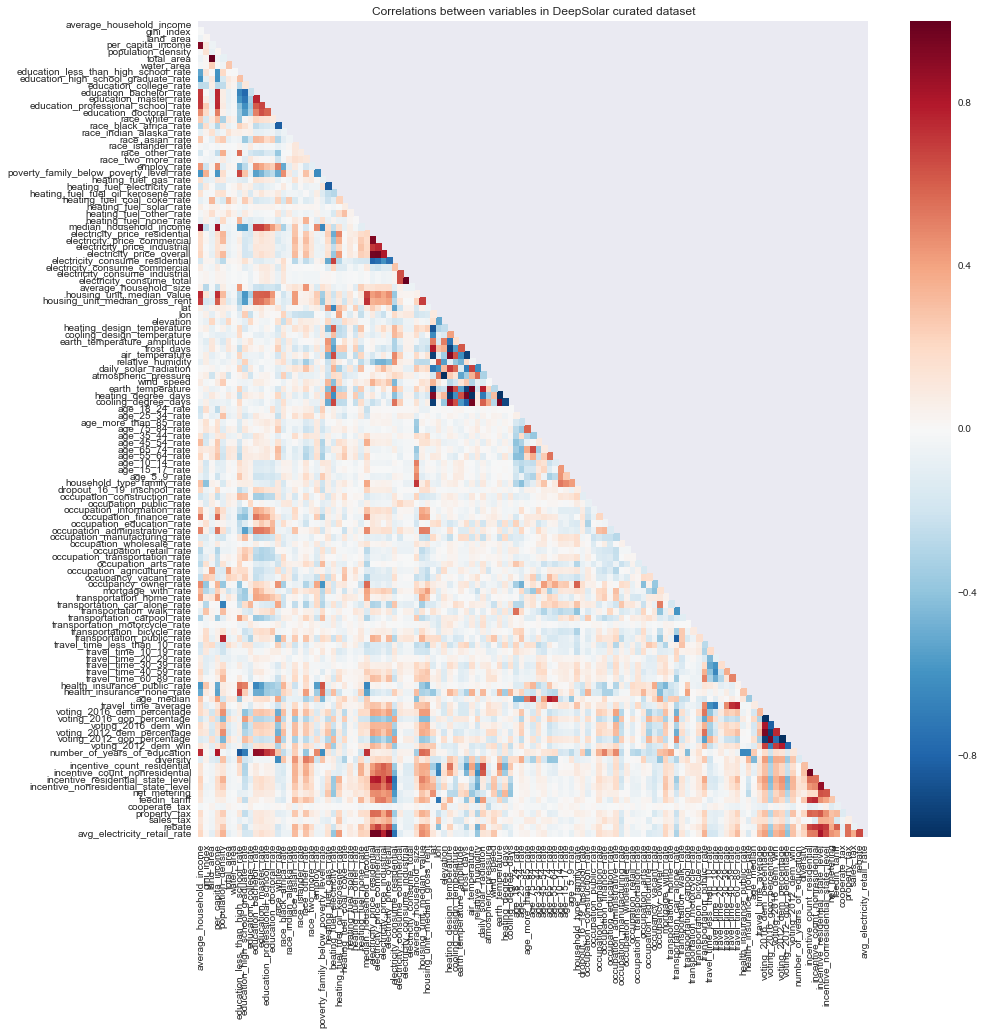

In [92]:
# plot heatmap for correlations
def heatmap(matrix):
    plt.figure(figsize=(15,15))
    mask = np.zeros_like(matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(matrix, mask=mask) 
    plt.title("Correlations between variables in DeepSolar curated dataset")
    plt.show()
heatmap(correlation_matrix)

In [69]:
# calculate pairs of highly correlated variables
correlations=[]
for i in correlation_matrix.index:
    for j in correlation_matrix.columns:
            if i!=j:
                correlations.append((i,j,correlation_matrix[i][j]))
sorted_correlations=sorted(correlations,reverse=True,key=lambda k: k[2])

In [70]:
print('Top Positive Correlations: ')
positive_corr = [i for i in sorted_correlations if i[2] >= 0.8]
for i in positive_corr:
    print(i)

Top Positive Correlations: 
('electricity_consume_industrial', 'electricity_consume_total', 0.99999920193649006)
('electricity_consume_total', 'electricity_consume_industrial', 0.99999920193649006)
('land_area', 'total_area', 0.99898005680878932)
('total_area', 'land_area', 0.99898005680878932)
('electricity_price_overall', 'avg_electricity_retail_rate', 0.99429689904150353)
('avg_electricity_retail_rate', 'electricity_price_overall', 0.99429689904150353)
('air_temperature', 'earth_temperature', 0.98420121459843912)
('earth_temperature', 'air_temperature', 0.98420121459843912)
('electricity_price_commercial', 'electricity_price_overall', 0.97061953815615964)
('electricity_price_overall', 'electricity_price_commercial', 0.97061953815615964)
('electricity_price_commercial', 'avg_electricity_retail_rate', 0.96571683772376282)
('avg_electricity_retail_rate', 'electricity_price_commercial', 0.96571683772376282)
('electricity_price_residential', 'avg_electricity_retail_rate', 0.9651710803446

In [71]:
print('Top Negative Correlations: ')
negative_corr = [i for i in sorted_correlations if i[2] <= -0.8]
for i in negative_corr:
    print(i)

Top Negative Correlations: 
('frost_days', 'cooling_degree_days', -0.80757030236734573)
('cooling_degree_days', 'frost_days', -0.80757030236734573)
('voting_2016_gop_percentage', 'voting_2016_dem_win', -0.82083760716005183)
('voting_2016_dem_win', 'voting_2016_gop_percentage', -0.82083760716005183)
('transportation_car_alone_rate', 'transportation_public_rate', -0.82492515263920707)
('transportation_public_rate', 'transportation_car_alone_rate', -0.82492515263920707)
('race_white_rate', 'race_black_africa_rate', -0.8280465077460718)
('race_black_africa_rate', 'race_white_rate', -0.8280465077460718)
('heating_fuel_gas_rate', 'heating_fuel_electricity_rate', -0.83158412980064611)
('heating_fuel_electricity_rate', 'heating_fuel_gas_rate', -0.83158412980064611)
('education_less_than_high_school_rate', 'number_of_years_of_education', -0.85047144985148704)
('number_of_years_of_education', 'education_less_than_high_school_rate', -0.85047144985148704)
('lat', 'heating_design_temperature', -0.8

#### Check assumptions for Pearson correlations before removing any highly correlated variables:
* Normal distribution: Do individual variables have a normal distribution?  
* Linearity: Are variables linearly correlated with each other? Visually: is there a straight line relationship between the two variables?  
* Homoscedasticity: Is the data equally distributed around the regression line when it's plotted against the outcome variable?  

In [72]:
# Collect all variables into a list of correlated pairs
correlated_pairs = []
# Because each pair is listed twice, collect every other pair of both positive and negative correlations
for i in range(len(positive_corr)):
    if i % 2 == 0:
        correlated_pairs.append((positive_corr[i][0], positive_corr[i][1]))
for i in range(len(negative_corr)):
    if i % 2 == 0:
        correlated_pairs.append((negative_corr[i][0], positive_corr[i][1]))

In [73]:
# Collect all variables into a single list where each one appears only once
correlated_variables = []
for i in correlated_pairs:
    if i[0] not in correlated_variables:
        correlated_variables.append(i[0])
    if i[1] not in correlated_variables:
        correlated_variables.append(i[1])
print(len(correlated_variables))

38


Normal distributions: Plot histograms of all individual variables potentially correlated with another

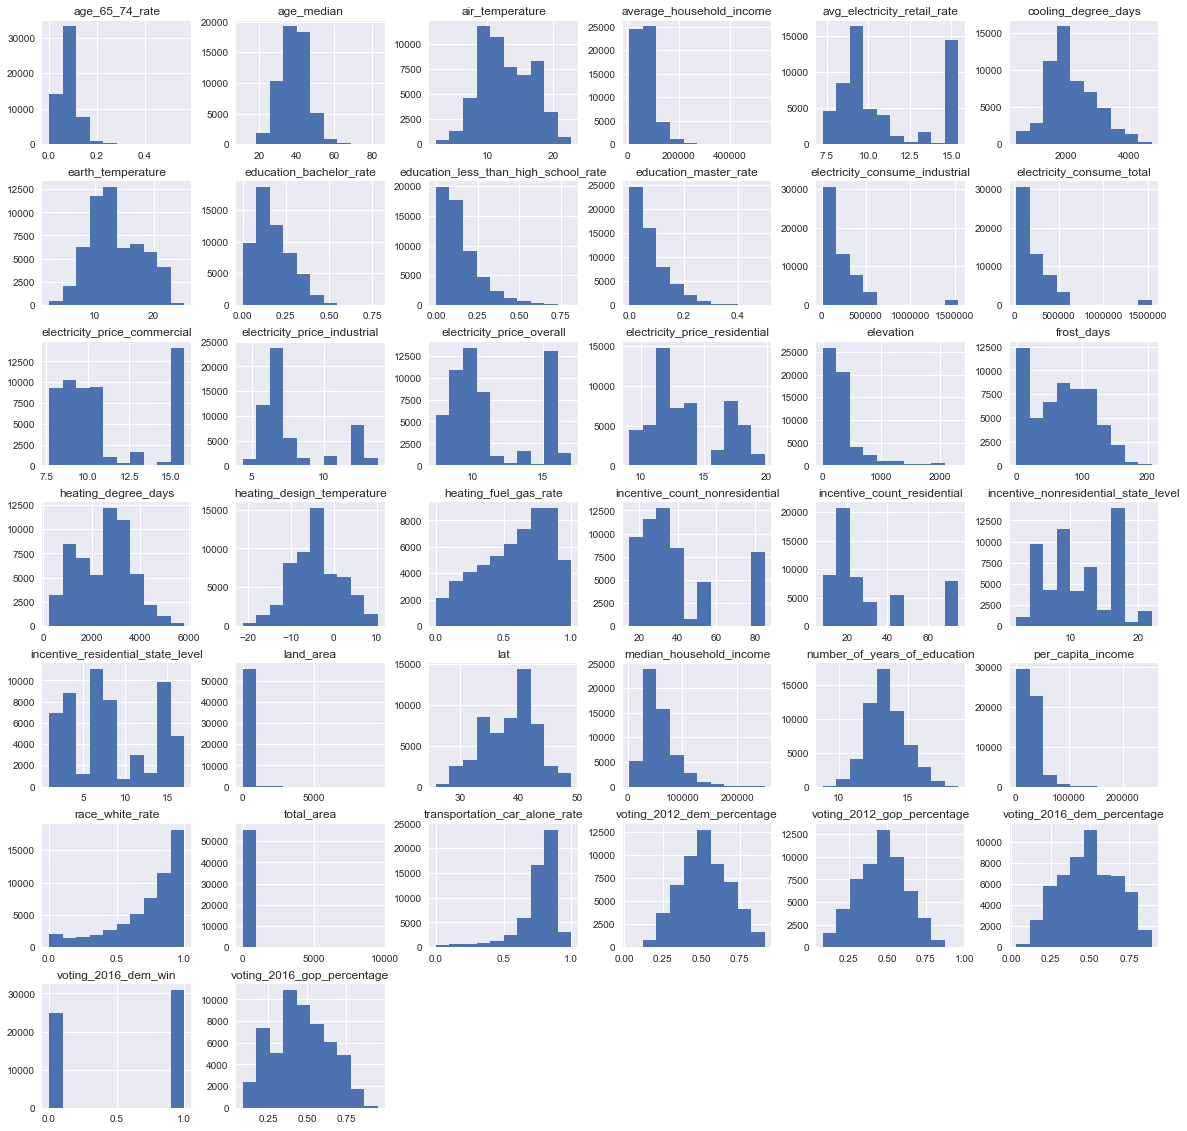

In [74]:
deepsolar_curated[correlated_variables].replace(np.inf,np.nan).dropna().hist(figsize=(20,20))
plt.show()

Linearity: create scatterplots of each pair of highly correlated variables

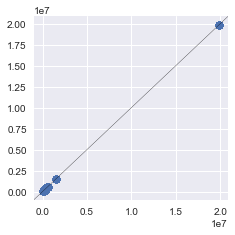

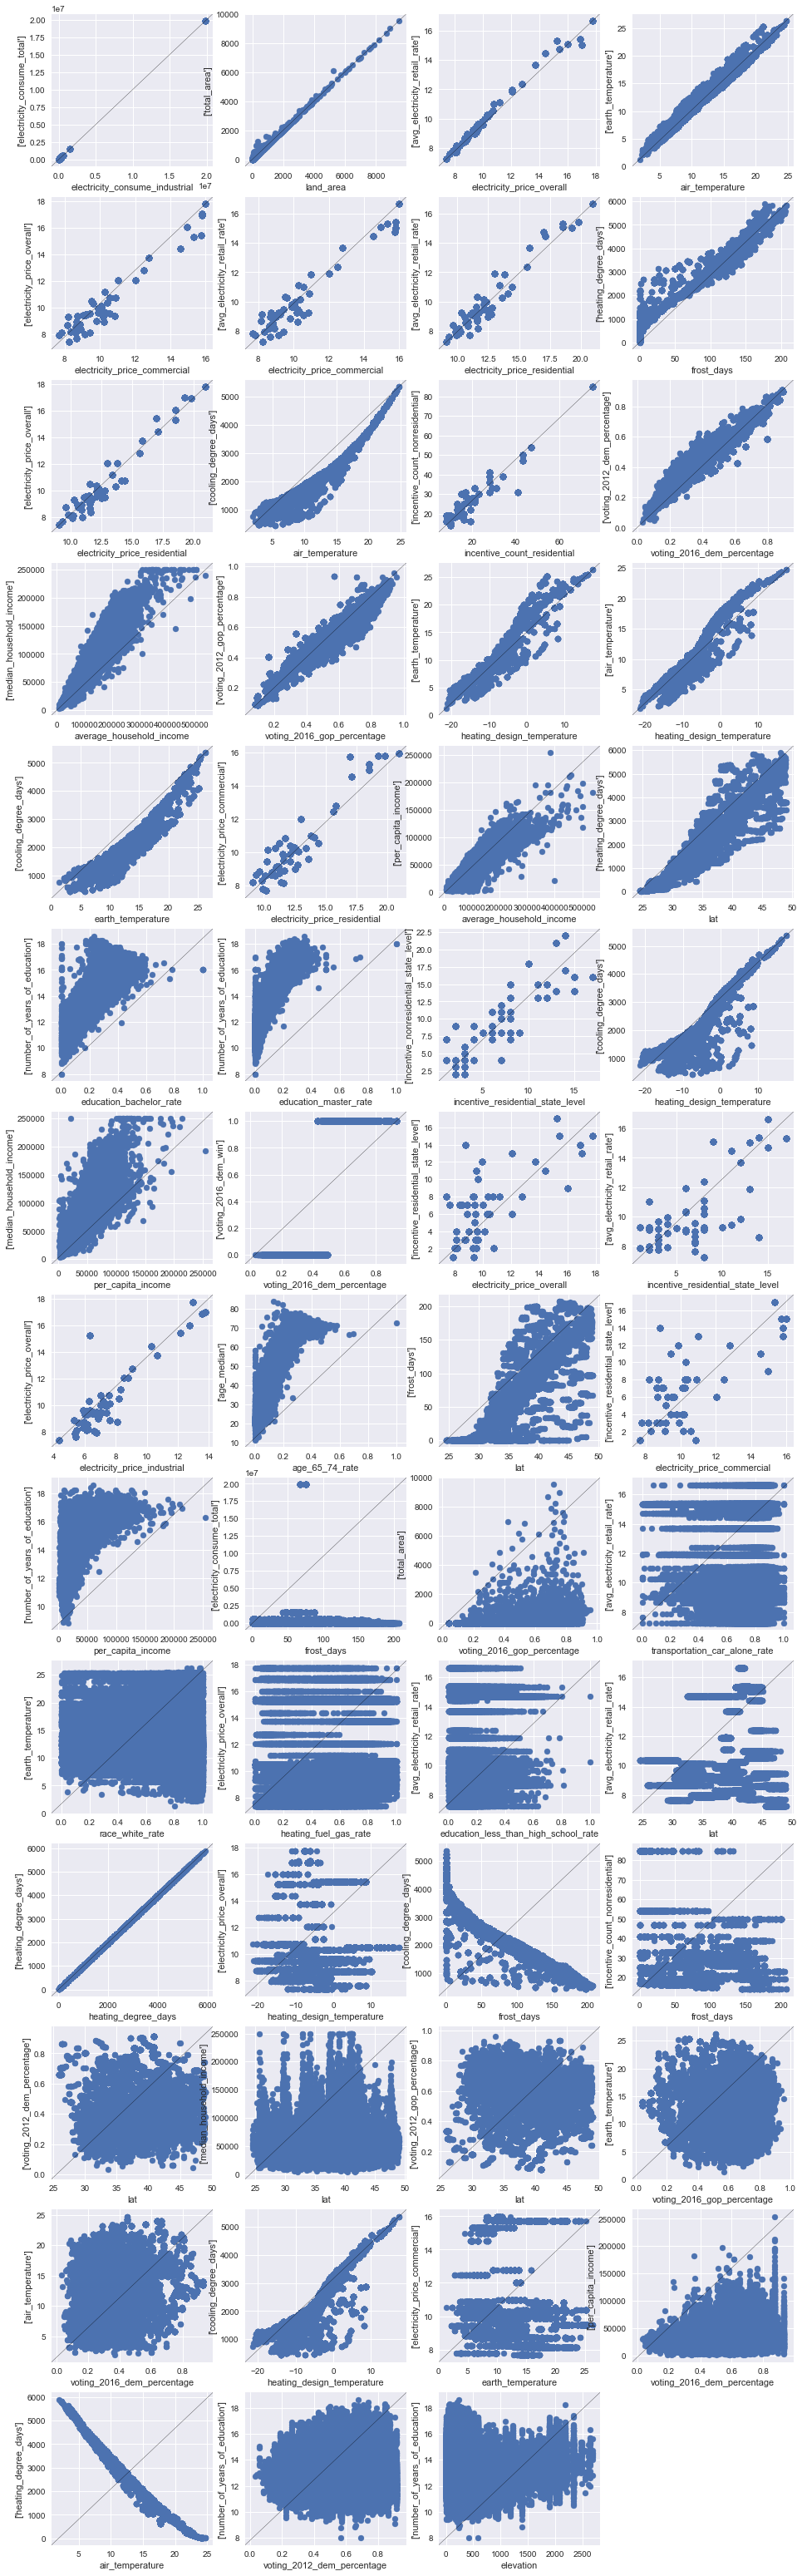

In [137]:
def scatterplots_linearity (dataset, pairs):
    # set plot sizes
    subplot_cols = 4
    figsize_width = subplot_cols**2
    if len(pairs) <= figsize_width:
        subplot_rows = 4
        figsize_height = 16
    else:
        subplot_rows = len(pairs)//subplot_cols + 1
        figsize_height = subplot_rows*4
    fig = plt.figure(figsize=(figsize_width, figsize_height))
    # show scatterplot for each pair with linear correlation line
    for i in range(len(pairs)):
        ax = fig.add_subplot(subplot_rows, subplot_cols, i+1)
        ax.scatter(dataset[pairs[i][0]], dataset[pairs[i][1]])
        ax.set(xlabel=pairs[i][0], ylabel=pairs[i][1])
        # add linear baseline
        line = mlines.Line2D([0, 1], [0, 1], color='black', linewidth = .3)
        transform = ax.transAxes
        line.set_transform(transform)
        ax.add_line(line)
    plt.show()


scatterplots_linearity(deepsolar_curated, correlated_pairs)

Homoscedasticity: Create scatterplots of each variable's linear relationship with the outcome variable to confirm relatively equal distribution over the regression line.

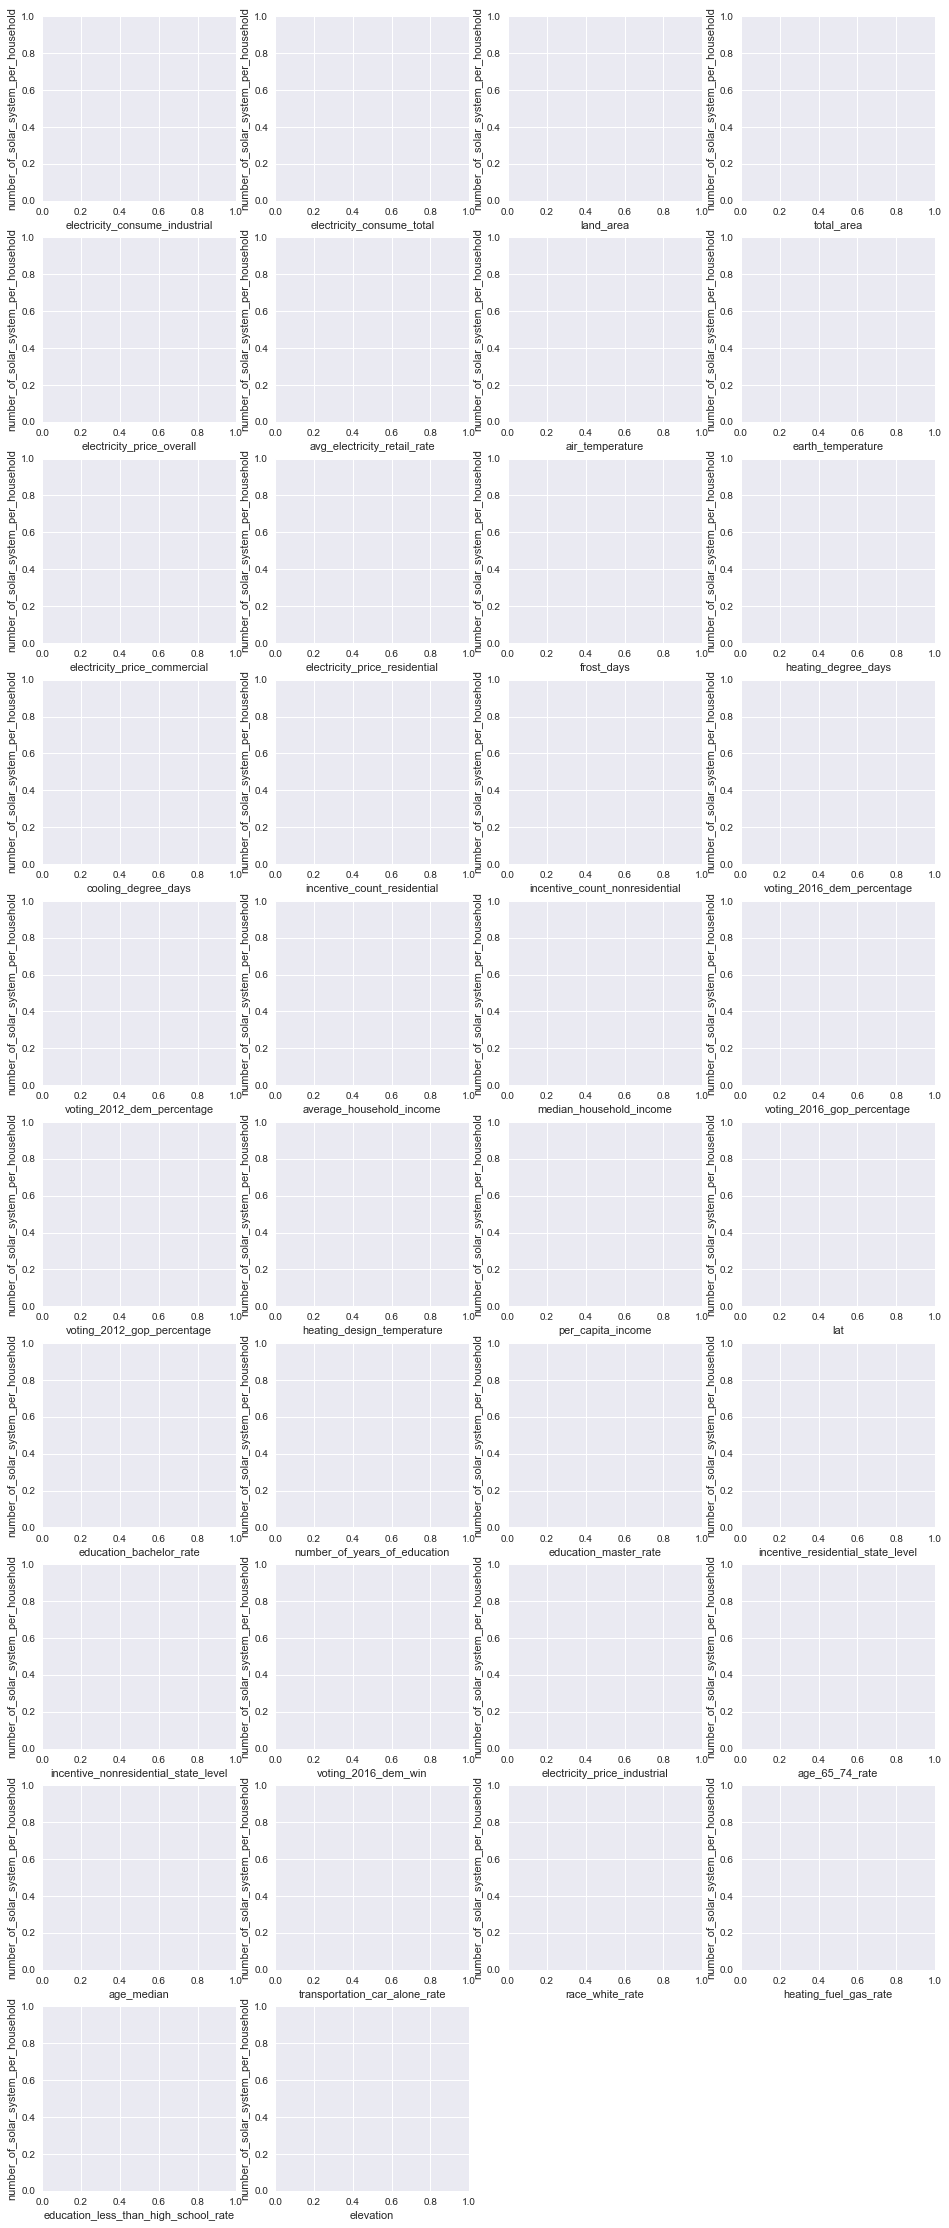

In [141]:
def scatterplots_homoscedasticity (dataset, variables, outcome_var):
    # set plot sizes
    subplot_cols = 4
    figsize_width = subplot_cols**2
    if len(variables) <= figsize_width:
        subplot_rows = 4
        figsize_height = 16
    else:
        subplot_rows = len(variables)//subplot_cols + 1
        figsize_height = subplot_rows*4
    fig = plt.figure(figsize=(figsize_width, figsize_height))
    # show scatterplot for each pair with linear correlation line
    for i in range(len(variables)):
        ax = fig.add_subplot(subplot_rows, subplot_cols, i+1)
        ax.set(xlabel=variables[i], ylabel=outcome_var)
        # add scatterplot for variable vs. outcome variable

        # add regression line - TO DO
 
    plt.show()


scatterplots_homoscedasticity(deepsolar_curated, correlated_variables, outcome_var)

Variable pairs, grouped by type, that have a positive correlation value over 0.80 or a negative correlation under -0.80 (based on Pearson correlation only, not yet modified by results of assummption visualizations):


**Electricity prices and incentives**  
electricity_price_overall, avg_electricity_retail_rate  
electricity_price_commercial, avg_electricity_retail_rate  
electricity_price_residential, avg_electricity_retail_rate  
electricity_price_residential, electricity_price_overall  
electricity_price_residential, electricity_price_commercial  
electricity_price_overall, incentive_residential_state_level  
incentive_residential_state_level, avg_electricity_retail_rate  
electricity_price_industrial, electricity_price_overall  
incentive_count_residential, incentive_count_nonresidential  
incentive_residential_state_level, incentive_nonresidential_state_level  
electricity_price_commercial, incentive_residential_state_level  

**Weather and heating/cooling**  
air_temperature, earth_temperature  
frost_days, heating_degree_days  
air_temperature, cooling_degree_days  
heating_design_temperature, earth_temperature  
heating_design_temperature, air_temperature  
earth_temperature, cooling_degree_days  
lat, heating_degree_days  
heating_design_temperature, cooling_degree_days  
lat, frost_days  
frost_days, cooling_degree_days  
cooling_degree_days, frost_days  
*Negative correlation*:  
lat, heating_design_temperature   
heating_degree_days, cooling_degree_days    
heating_design_temperature, frost_days  
frost_days, earth_temperature   
frost_days, air_temperature  
lat, earth_temperature  
lat, cooling_degree_days  
lat, air_temperature  
heating_design_temperature, heating_degree_days  
earth_temperature, heating_degree_days   
air_temperature, heating_degree_days   
elevation, atmospheric_pressure   
  
**Political**  
voting_2016_dem_percentage, voting_2012_dem_percentage  
voting_2016_gop_percentage, voting_2012_gop_percentage  
voting_2016_dem_percentage, voting_2016_dem_win  
*Negative correlation*:  
voting_2016_gop_percentage, voting_2016_dem_win  
voting_2016_gop_percentage, voting_2012_dem_percentage   
voting_2016_dem_percentage, voting_2012_gop_percentage    
voting_2012_dem_percentage, voting_2012_gop_percentage  

**Socio-economic**  
average_household_income, median_household_income  
average_household_income, per_capita_income  
education_bachelor_rate, number_of_years_of_education  
education_master_rate, number_of_years_of_education  
per_capita_income, median_household_income  
*Negative correlation*:  
education_less_than_high_school_rate, number_of_years_of_education  
race_white_rate, race_black_africa_rate   

**Misc**  
electricity_consume_industrial, electricity_consume_total  
land_area, total_area  
age_65_74_rate, age_median  
*Negative correlation*:  
transportation_car_alone_rate, transportation_public_rate  
heating_fuel_gas_rate, heating_fuel_electricity_rate  

In [85]:
# Variables to possibly remove because they are positively correlated with each other - UPDATE based on visualization
variables_dict['electricity_consume_industrial'] = 'Positively correlated with electricity_consume_total'
variables_dict['total_area'] = 'Positively correlated with land_area'
variables_dict['earth_temperature'] = 'Positively correlated with air_temperature'
variables_dict['avg_electricity_retail_rate'] = 'Positively correlated with electricity_price_residential'
variables_dict['heating_degree_days'] = 'Positively correlated with frost_days and lat'
variables_dict['electricity_price_overall'] = 'Positively correlated with electricity_price_residential'
variables_dict['cooling_degree_days'] = 'Positively correlated with air_temperature'
variables_dict['incentive_count_nonresidential'] = 'Positively correlated with incentive_count_residential'
variables_dict['voting_2012_dem_percentage'] = 'Positively correlated with voting_2016_dem_percentage'
variables_dict['voting_2012_gop_percentage'] = 'Positively correlated with voting_2016_gop_percentage'
variables_dict['heating_design_temperature'] = 'Positively correlated with air_temperature'
variables_dict['average_household_income'] = 'Positively correlated with median_household_income and \
    per_capita_income'
variables_dict['electricity_price_commercial'] = 'Positively correlated with electricity_price_residential'
variables_dict['atmospheric_pressure'] = 'Negatively correlated with elevation'
variables_dict['lat'] = 'Negatively correlated with air_temperature'

TO DO:
Remove other variables not related to residential panels (like nonresidential incentives, electricity prices, etc.

In [ ]:
# TO DO: update the variables list after remove additional variables

# Convert variable dictionary to list
drop_variables = []
for key,val in variables_dict.items():
    if val!=1:
        drop_variables.append(key)
dropped_var_number = len(drop_variables)
print("Number of variables to be dropped:", dropped_var_number, "\n")
print("After dropping variables, dataset should have", original_shape[1]-dropped_var_number)

In [63]:
deepsolar = deepsolar_curated.drop(labels=drop_variables, axis=1)

TO DO:  
Look at missing values, blank values, infinity values.  Impute missing values. Anything else?  
Then save as CSV file to input into model.